In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.spatial.transform import Rotation

 - https://stackoverflow.com/questions/78434979/how-to-fit-a-column-by-3-d-coordinate-points-in-space
 - https://stackoverflow.com/questions/43784618/fit-a-cylinder-to-scattered-3d-xyz-point-data
 - https://math.stackexchange.com/questions/141593/formula-for-cylinder?newreg=52c6b3d9cb1d47c1aaa3ff0706aa2298
 - https://mathworld.wolfram.com/Point-LineDistance3-Dimensional.html
 

In [2]:
def cylinder(n=60, m=20, r=2, h=5):
    t = np.linspace(0, m * 2 * np.pi, m * n)
    z = np.linspace(0, h, m * n)
    x = r * np.cos(t)
    y = r * np.sin(t)
    return np.stack([x, y, z]).T

In [3]:
X = cylinder()

In [4]:
rot = Rotation.from_rotvec(np.array([-1, 2, 0.5]))

In [5]:
x0 = np.array([1., 2., 0.])

In [6]:
X = rot.apply(X)
X = X + x0

In [60]:
def residuals(p, xyz):
    return np.power(np.linalg.norm(np.cross((xyz - p[0:3]), (xyz - p[3:6])), axis=1) / np.linalg.norm((p[3:6] - p[0:3])), 2) - p[6] ** 2

In [56]:
np.linalg.norm(X, axis=1)

array([1.96955669, 2.02364645, 2.08929725, ..., 6.81139853, 6.82193418,
       6.8366838 ])

In [61]:
p, res = optimize.leastsq(residuals, x0=[0., 0., 0., 1., 1., 1., 0.], args=(X,), full_output=False)

In [58]:
p

array([ -1.8283916 ,  -1.65918186,   3.29901757,  20.31455462,
        26.98786514, -22.52837088,   2.        ])

(-4.835982009450505, 1.8597970456165096)

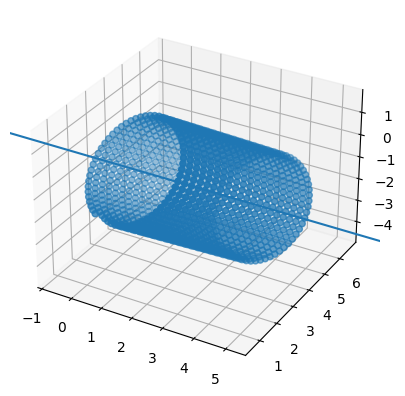

In [68]:
fig, axe = plt.subplots(subplot_kw={"projection": "3d"})
axe.scatter(*X.T)
xlim, ylim, zlim = axe.get_xlim(), axe.get_ylim(), axe.get_zlim()
axe.plot(*list(zip(p[0:3], p[3:6])))
axe.set_xlim(xlim)
axe.set_ylim(ylim)
axe.set_zlim(zlim)